# Day 23: ROC Curve & AUC 📈

### Objective:
- Understand **Receiver Operating Characteristic (ROC) Curve**.
- Compute **Area Under Curve (AUC)** to measure model performance.

### Key Concepts:

- **ROC Curve**: Plots **True Positive Rate (TPR / Recall)** vs **False Positive Rate (FPR)** at different thresholds.
- **AUC (Area Under Curve)**: Measures overall model ability to discriminate between classes.
  - 1 → Perfect model
  - 0.5 → Random guessing
  - <0.5 → Worse than random


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
import string


## 1️⃣ Load Dataset


In [2]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label','message'])

# Encode labels: ham=0, spam=1
df['label_enc'] = df['label'].map({'ham':0, 'spam':1})

# Preprocess text
df['message_clean'] = df['message'].apply(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation)))


## 2️⃣ Feature Extraction & Train-Test Split


In [3]:
cv = CountVectorizer()
X = cv.fit_transform(df['message_clean'])
y = df['label_enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## 3️⃣ Train Naive Bayes Classifier


In [4]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]  # probability for class 1 (spam)


## 4️⃣ Compute ROC Curve & AUC


In [5]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

print("AUC Score:", auc_score)


AUC Score: 0.977580001945336


## 5️⃣ Plot ROC Curve


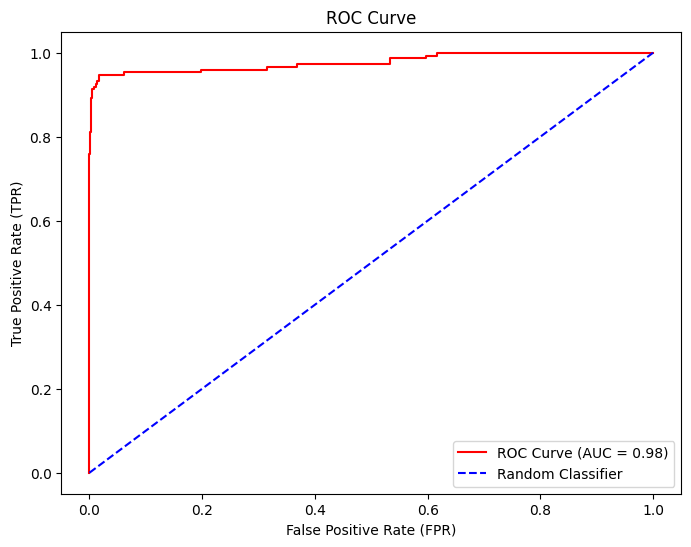

In [6]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1],[0,1], color='blue', linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


### 🔑 Key Takeaways:

- ROC curve visualizes **trade-off between TPR and FPR**.  
- AUC quantifies overall model performance; closer to 1 is better.  
- Useful for **imbalanced datasets** where accuracy alone is misleading.  
- Works for any **binary classifier** that can output probabilities.
